# Tutoriel 1: One dimension FFT 

### Table of contents

* [1.1 Simple sine and cosine waves](#1.1-Simple-sine-and-cosine-waves)

* [1.2 Changing the amplitude, period and phase](#1.2-Changing-the-amplitude,-period-and-phase)

* [1.3 Case of a Dirac-delta function](#1.3-Case-of-a-Dirac-delta-(impulse)-function)

* [1.4 Case of sum of sine waves](#1.4-Case-of-sum-of-sine-waves)

* [1.5 Case of random noise](#1.5-Case-of-random-noise)

* [1.6 Case of signal and added random noise](#1.6-Case-of-signal-and-added-random-noise)

* [1.7 Case of different window functions](#1.7-Case-of-different-window-functions)

> Authors: *F. Cantalloube - P. Priolet*  
> Last update: *2022/06*

In [70]:
import numpy as np
from scipy import signal
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

## 1.1 Simple sine and cosine waves

In [3]:
# Data points Real space (Npoints = 126)
x = np.arange(-np.pi, np.pi, 0.05)
# Data points Fourier space (centered)
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

# Creating the cosine and sine waves: Amplitude 1, Phase shift 0, Pulsation (period) 5
T = 5
sinT = np.sin(x*T)
cosT = np.cos(x*T) 

# Fourier transform of the cos and sin waves: 
TF_sinT = np.fft.fftshift(np.fft.fft(sinT))
TF_cosT = np.fft.fftshift(np.fft.fft(cosT))

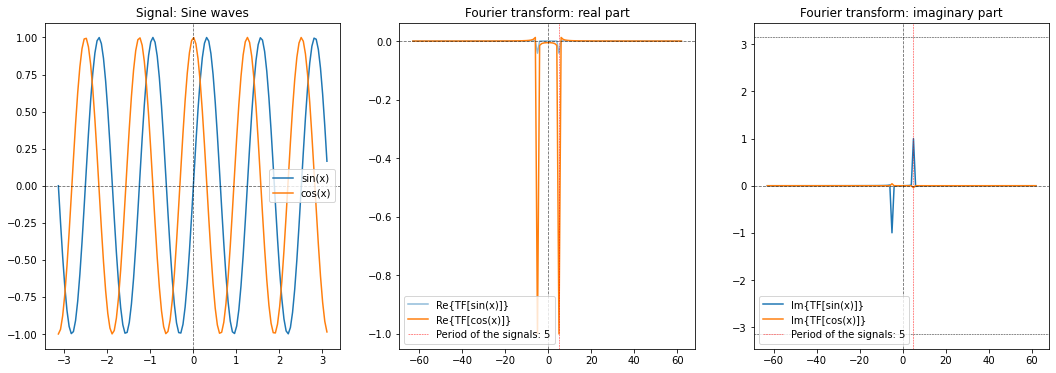

In [4]:
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)

# Plot the signals
plt.subplot(131)
plt.plot(x, sinT, label="sin(x)")
plt.plot(x, cosT, label="cos(x)")
plt.title('Signal: Sine waves')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Real part (normalized)
plt.subplot(132)
plt.plot(x_f,np.real(TF_sinT)/(np.shape(x)[0]/2), label="Re{TF[sin(x)]}", alpha = 0.5)
plt.plot(x_f,np.real(TF_cosT)/(np.shape(x)[0]/2), label="Re{TF[cos(x)]}")
plt.axvline(x=T, color='r', ls = '--', lw=0.5, alpha=0.9, label = "Period of the signals: "+str(T))
plt.title('Fourier transform: real part')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Imaginary part (normalized)
plt.subplot(133) 
plt.plot(x_f,np.imag(TF_sinT)/(np.shape(x)[0]/2), label="Im{TF[sin(x)]}")
plt.plot(x_f,np.imag(TF_cosT)/(np.shape(x)[0]/2), label="Im{TF[cos(x)]}")
plt.axvline(x=T, color='r', ls = '--', lw=0.5, alpha=0.9, label = "Period of the signals: "+str(T))
plt.title('Fourier transform: imaginary part')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=np.pi, color='k', ls = '--', lw=0.5, alpha=0.9)
plt.axhline(y=-np.pi, color='k', ls = '--', lw=0.5, alpha=0.9)

plt.show()

In [5]:
print('Number of points for signal:', np.shape(cosT))
print('Number of points for its FT:', np.shape(TF_cosT))

print('Max of Imag(cosT):', np.max(np.imag(TF_cosT))/(np.shape(x)[0]/2)) #About the nb of points of precision (1/N)
print('Max of Imag(sinT):', np.max(np.imag(TF_sinT))/(np.shape(x)[0]/2)) #About 1

Number of points for signal: (126,)
Number of points for its FT: (126,)
Max of Imag(cosT): 0.04195700693290917
Max of Imag(sinT): 0.9975154604907793


**Reminder on complex numbers and numpy syntax:**

If $z$ is a complex number written $z = x + iy$ (with $i^2 = -1$) 

Then np.real(z) = Re{z} = x and np.imag(z) = Im{z} = y

It can also be written $z = |z| e^{i\theta} = |z| cos(\theta) + i |z| sin (\theta) $,

so that $ x = |z| cos(\theta)$ and $ y = |z| sin(\theta)$,

and the relations np.abs(z) $ = |z| = \sqrt{(x^2+y^2)} $ and  np.angle(z) $=\theta = tan^{-1}(y/x)$

*** 
**Reminder on Fourier Transform of cosine and sine waves:**

https://www.thefouriertransform.com/pairs/sinusoids.php

https://www.youtube.com/watch?v=mkGsMWi_j4Q


*** 
So in our example signal $s$ above that is in the two specific cases of a pure sine (blue lines) or a pure cosine (orange line) wave:

$|z| = 1$, so taking np.abs(s) would render two peaks of height 1. Instead, taking the real part with np.real(s) so that the peak heigt is multiplied by $cos(\theta)$: if the signal is a pure cosine wave it is 1 (orange case), if the signal is a pure sine wave it is 0 (blue case).

$\theta $ is going from $0$ to $2\pi$, and taking np.angle(s) would render 0 for a pure cosine wave and $3\pi/2$ for a pure sine wave. Instead, taking the imaginary part with np.imag(s), the sign tells us about the phase shift from a cosine wave reference and the peak heigt is multiplied by $sin(\theta)$: if the signal is a pure cosine wave it is 0 (orange case), if the signal is a pure sine wave it is 1 (blue case).


## 1.2 Changing the amplitude, period and phase
Here you can change those three parameters to see the effect it has on the Fourier transform

In [6]:
#Parameters for the sine waves
A  = 10.    #Amplitude >0.
T  = 10.    #Pulsation [1-np.shape(x)]
Ph = -0.25  #Phase [-pi:pi] i.e. it must be a factor in [-1,1]
print('-------------------')
print('Amplitude = ',A)
print('Pulsation = ',T)
print('Phase shift = ', Ph)
print('-------------------')


# Points Real space (Npoints = 126)
x = np.arange(-np.pi, np.pi, 0.05)
# Points Fourier space (centered)
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

#Creating the corresponding cosine waves: 
cosT = np.cos(x) 
cosP = A*np.cos(x*T+Ph*np.pi) 

# Fourier transform of the cosine waves: 
TF_cosT =np.fft.fftshift(np.fft.fft(cosT))
TF_cosP =np.fft.fftshift(np.fft.fft(cosP))

-------------------
Amplitude =  10.0
Pulsation =  10.0
Phase shift =  -0.25
-------------------


<Figure size 1296x432 with 0 Axes>

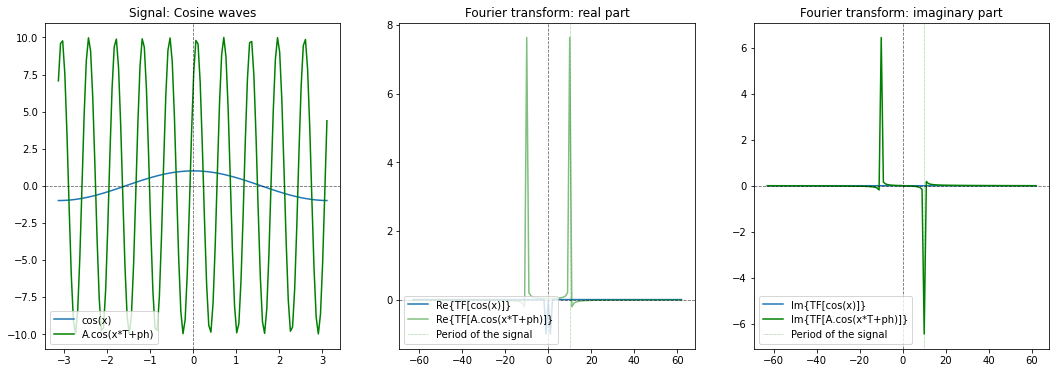

In [7]:
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)

# Plot the signals
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)
plt.subplot(131)
plt.plot(x, cosT, label="cos(x)")
plt.plot(x, cosP, color='g', label="A.cos(x*T+ph)")
plt.title('Signal: Cosine waves')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Real part (normalized)
plt.subplot(132)
plt.plot(x_f,np.real(TF_cosT)/(np.shape(x)[0]/2), label="Re{TF[cos(x)]}")
plt.plot(x_f,np.real(TF_cosP)/(np.shape(x)[0]/2), label="Re{TF[A.cos(x*T+ph)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: real part')
plt.axvline(x=T, color='g', ls = ':', lw=0.5, alpha=0.9, label = "Period of the signal")
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend(loc='lower left')

# Plot Imaginary part (normalized)
plt.subplot(133) 
plt.plot(x_f,np.imag(TF_cosT)/(np.shape(x)[0]/2), label="Im{TF[cos(x)]}")
plt.plot(x_f,np.imag(TF_cosP)/(np.shape(x)[0]/2), label="Im{TF[A.cos(x*T+ph)]}", color = 'g')
plt.title('Fourier transform: imaginary part')
plt.axvline(x=T, color='g', ls = ':', lw=0.5, alpha=0.9, label = "Period of the signal")
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend(loc='lower left')

plt.show()

In [8]:
#Print information about signals:
print('--- Info on Real part (normalized by nb of points)')
print('Min(Re{FT[signal]}):', np.min(np.real(TF_cosP)/(np.shape(x)[0]/2)))
print('Max(Re{FT[signal]}):', np.max(np.real(TF_cosP)/(np.shape(x)[0]/2)))
print('A.Cos(Ph):', A*np.cos(Ph*np.pi))
print('--- Info on Imaginary part (normalized by nb of points and amplitude)')
print('Min(Im{FT[signal]}):', np.min(np.imag(TF_cosP)/(np.shape(x)[0]/2)))
print('Max(Im{FT[signal]}):', np.max(np.imag(TF_cosP)/(np.shape(x)[0]/2)))
print('A.Sin(Ph):', A*np.sin(Ph*np.pi))
print('-------------------')

--- Info on Real part (normalized by nb of points)
Min(Re{FT[signal]}): -0.20958231553505113
Max(Re{FT[signal]}): 7.631617691485381
A.Cos(Ph): 7.0710678118654755
--- Info on Imaginary part (normalized by nb of points and amplitude)
Min(Im{FT[signal]}): -6.436819606888151
Max(Im{FT[signal]}): 6.436819606888151
A.Sin(Ph): -7.071067811865475
-------------------


A few conclusions from here:
- Cosine wave gives the **origin** for the zero phase (blue)
- **Real part of the FT:** (i) the peak centered at the period $T$; (ii) the height of the peaks is between [-A,A], with $A$ the amplitude of the signal; (iii) the exact height of the peaks is linked to the phase shift as it is multiplied by $cos(\phi)$.
- **Imaginary part of the FT:** (i) the peak centered at the period $T$; (ii) the height of the peaks is between [-A,A], with $A$ the amplitude of the signal; (iii) the exact height of the peaks is linked to the phase shift as it is multiplied by $sin(\phi)$; the signs of the peak gives whether the phase shift is between [0,pi] or [-pi,0], that is to say if the phase shift $Ph$ is negative or positive.

Both real and imaginary part are normalized to sum(signal).

Note: you can change the phase, amplitude and period to see how the signals change (e.g. By putting Phase = 0.5 you can change the cosinus wave into a sinus wave).

### Movie time !
Here we make an animation with changing phase shift so you can spot directly its effect on both the real and imaginary part of its Fourier Transform.

<IPython.core.display.Javascript object>


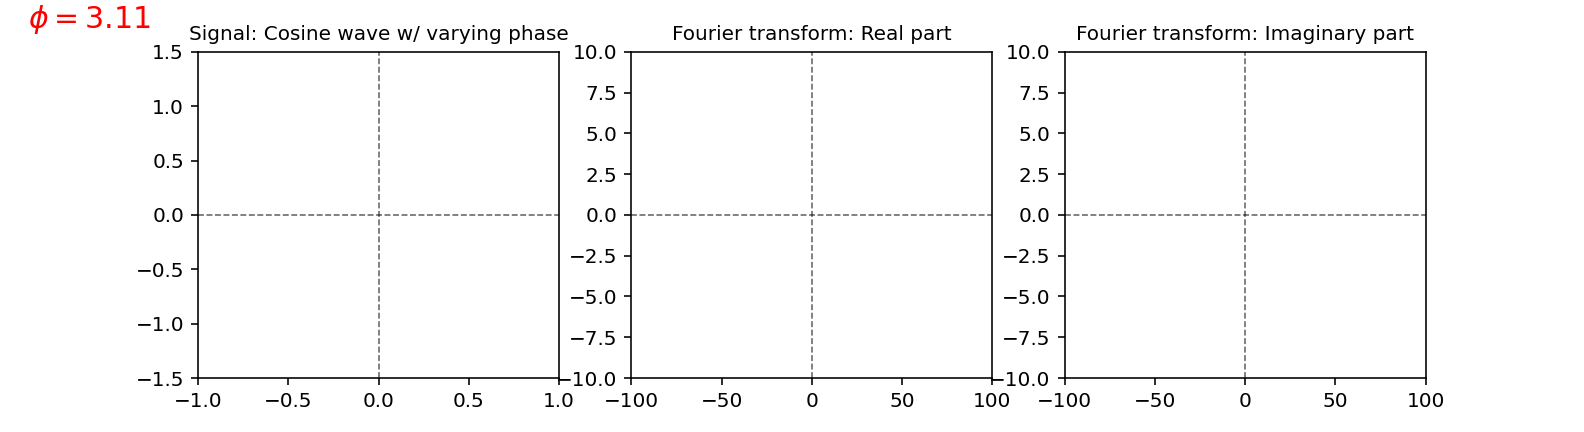

In [21]:
# Enable interactive plot
%matplotlib notebook

# Amplitude and pulsation 
A = 1.  #Amplitude >0.
T = 10  #Pulsation
# Data points
x = np.arange(-np.pi, np.pi, 0.005)
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

# defining limits along x and y
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(11, 3))
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1.5, 1.5])
ax2.set_xlim([-100, 100])
ax2.set_ylim([-10, 10])
ax3.set_xlim([-100, 100])
ax3.set_ylim([-10, 10])

ax1.set_title("Signal: Cosine wave w/ varying phase",fontsize=10)
ax2.set_title("Fourier transform: Real part",fontsize=10)
ax3.set_title("Fourier transform: Imaginary part",fontsize=10)

line1, = ax1.plot([], [], lw=2)
line2, = ax2.plot([], [], lw=2, color='r')
line3, = ax3.plot([], [], lw=2, color='r')
line = [line1, line2, line3]  

# initializing a line variable
ax1.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
ax1.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
ax2.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
ax2.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
ax3.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
ax3.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
label = plt.text(-640,12, r'$\phi = {}$'.format(-round(np.pi,3)),ha='center',va='center',fontsize=15,color='r')
  
def init():        
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    return line
   
def animate(i):
    Ph = i/100-1
    #Animating the wave shift
    cosP = A*np.cos(x*T+Ph*np.pi)     
    #Animating the real part of the fourier transform
    TF_cosP = np.fft.fftshift(np.fft.fft(cosP))
    TF_cosP_Re = np.real(TF_cosP)/(np.shape(x)[0]/2)*np.pi
    TF_cosP_Im = np.imag(TF_cosP)/(np.shape(x)[0]/2)*np.pi
    #Computing corresponding phase shift
    phi=np.arcsin(TF_cosP)/np.pi
    #Plotting 
    line[0].set_data(x, cosP)
    line[1].set_data(x_f, TF_cosP_Re)
    line[2].set_data(x_f, TF_cosP_Im)
    label.set_text(r'$\phi = {} $'.format(round(Ph*np.pi,2)))      
    return line

anim = FuncAnimation(fig, animate, init_func = init, frames = 200, interval = 2, blit = True)

[Go to the top](#Table-of-contents)

## 1.3 Case of a Dirac-delta (impulse) function

In [22]:
# Points Real space
x = np.arange(-np.pi, np.pi, 0.05)
# Points Fourier space
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

# Creating the cosine wave 
A = 1.    #Amplitude >0.
T  = 3.   #Pulsation [1-np.shape(x)]
Ph = 0.2  #Phase [-pi:pi] i.e. facteur [-1,1]
cosP = A*np.cos(x*T+Ph*np.pi) 

# Creating a delta function
delta = signal.unit_impulse(np.shape(x),'mid')
delta_shift = signal.unit_impulse(np.shape(x),100)

# Fourier transform of the functions:
TF_cosP =np.fft.fftshift(np.fft.fft(cosP))
TF_delta =np.fft.fftshift(np.fft.fft(delta))
TF_delta_shift =np.fft.fftshift(np.fft.fft(delta_shift))

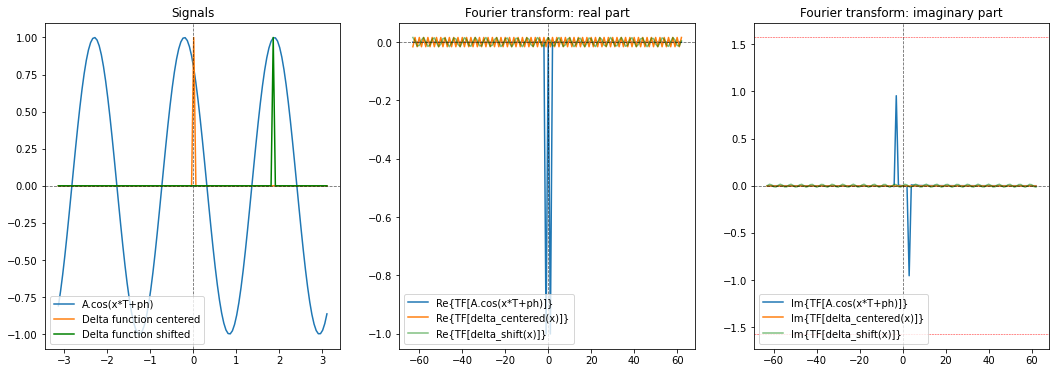

In [23]:
%matplotlib inline
plt.figure(figsize=(6*3, 2*3), constrained_layout=False)

# Plot signals
plt.subplot(131)
plt.plot(x, cosP, label="A.cos(x*T+ph)")
plt.plot(x, delta, label="Delta function centered")
plt.plot(x, delta_shift, color='g', label="Delta function shifted")
plt.title('Signals')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot real part (normalized)
plt.subplot(132)
plt.plot(x_f,np.real(TF_cosT)/(np.shape(x)[0]/2), label="Re{TF[A.cos(x*T+ph)]}")
plt.plot(x_f,np.real(TF_delta)/(np.shape(x)[0]/2), label="Re{TF[delta_centered(x)]}")
plt.plot(x_f,np.real(TF_delta_shift)/(np.shape(x)[0]/2), label="Re{TF[delta_shift(x)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: real part')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot imaginary part (normalized)
plt.subplot(133) 
plt.plot(x_f,np.imag(TF_cosP)/(np.shape(x)[0]/2)*np.pi/2, label="Im{TF[A.cos(x*T+ph)]}")
plt.plot(x_f,np.imag(TF_delta)/(np.shape(x)[0]/2), label="Im{TF[delta_centered(x)]}")
plt.plot(x_f,np.imag(TF_delta_shift)/(np.shape(x)[0]/2), label="Im{TF[delta_shift(x)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: imaginary part')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=np.pi/2, color='r', ls = '--', lw=0.5, alpha=0.9)
plt.axhline(y=-np.pi/2, color='r', ls = '--', lw=0.5, alpha=0.9)

plt.show()

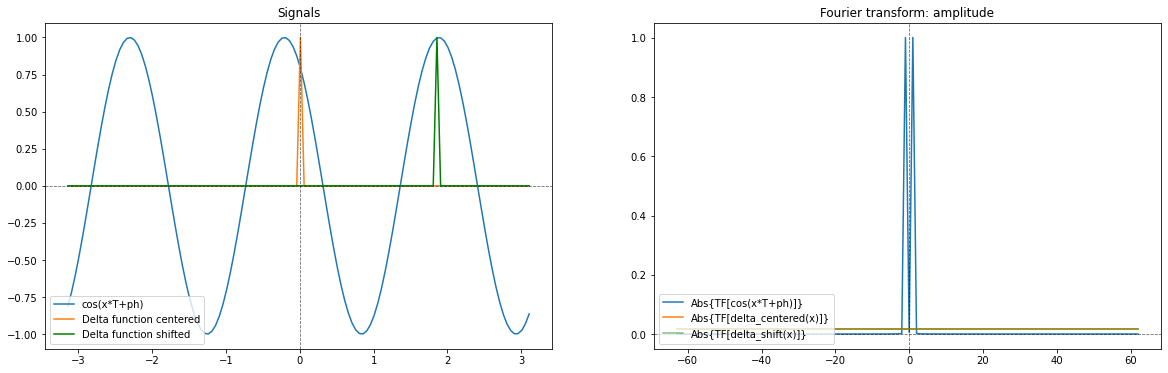

In [26]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

# Plot signals
plt.subplot(121)
plt.plot(x, cosP, label="cos(x*T+ph)")
plt.plot(x, delta, label="Delta function centered")
plt.plot(x, delta_shift, color='g', label="Delta function shifted")
plt.title('Signals')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

# Plot Amplitude of the TF(signals)
plt.subplot(122)
plt.plot(x_f,np.abs(TF_cosT)/(np.shape(x)[0]/2), label="Abs{TF[cos(x*T+ph)]}")
plt.plot(x_f,np.abs(TF_delta)/(np.shape(x)[0]/2), label="Abs{TF[delta_centered(x)]}")
plt.plot(x_f,np.abs(TF_delta_shift)/(np.shape(x)[0]/2), label="Abs{TF[delta_shift(x)]}",color='g', alpha = 0.5)
plt.title('Fourier transform: amplitude')
plt.legend(loc='lower left')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

plt.show()

In [27]:
#Numerical errors:
print('Max of the FT of the Dirac peak:',np.max(np.abs(TF_delta)/(np.shape(x)[0]/2)))
print('Numerical error:', 1/np.shape(x)[0]*2.)

Max of the FT of the Dirac peak: 0.015873015873015872
Numerical error: 0.015873015873015872


**Lessons learnt:**<br>
The Fourier Transform of a Dirac delta function is 1.<br>
The numerical error is linked to the number of points (see 1.2) - see [Nyquist frequency sampling](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)

## 1.4 Case of sum of sine waves
For this exercise, you can change the cosine wave into a sine wave.<br>
You can also add other periods.

In [30]:
T = [3,5,8,12,19]
signal = np.cos(x*T[0]) +  np.cos(x*T[1]) + np.cos(x*T[2]) + np.cos(x*T[3]) + np.cos(x*T[4])
TF_signal =np.fft.fftshift(np.fft.fft(signal))

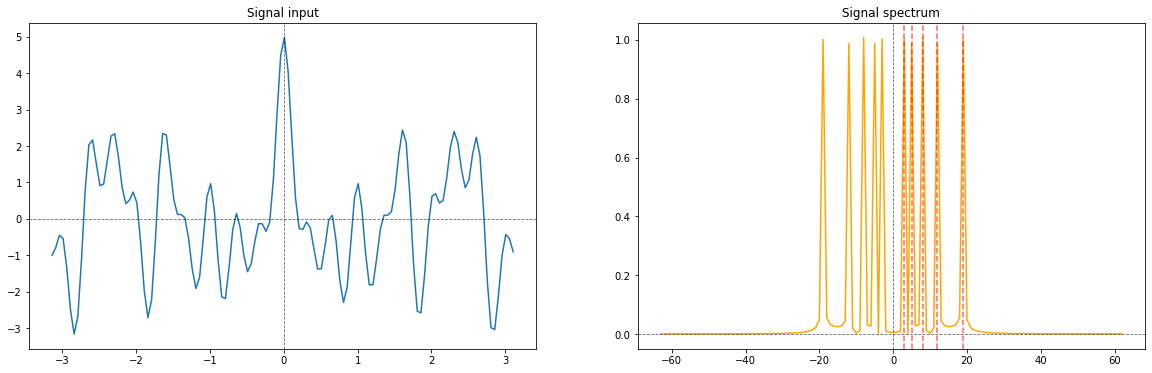

In [29]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

#Plot input signal
plt.subplot(121)
plt.plot(x,signal)
plt.title('Signal input')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

#Plot spectrum signal
plt.subplot(122)
plt.plot(x_f,np.abs(TF_signal)/(np.shape(x)[0]/2), color = 'orange')
plt.title('Signal spectrum')
plt.axvline(x=T[0], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[1], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[2], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[3], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[4], color='r', ls = '--', alpha=0.6)
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

plt.show()

In the example above, each peak of the Fourier transform (or signal spectrum) -as in the module of the signal, using np.abs(S)- is centered on the various periods in the mixed signal. Each peak in the spectrum is normalized to one. <br>
Let's now change the amplitude too

In [33]:

#Modify only the period, not the amplitude, nor the phase shift (useless)
T = [3,5,8,12,19]
A = [10,3.5,2.6,6,4.9]
signal2 = A[0]*np.cos(x*T[0]) + A[1]* np.cos(x*T[1]) + A[2]* np.cos(x*T[2]) + A[3]*np.cos(x*T[3]) + A[4]*np.cos(x*T[4])
TF_signal2 =np.fft.fftshift(np.fft.fft(signal2))

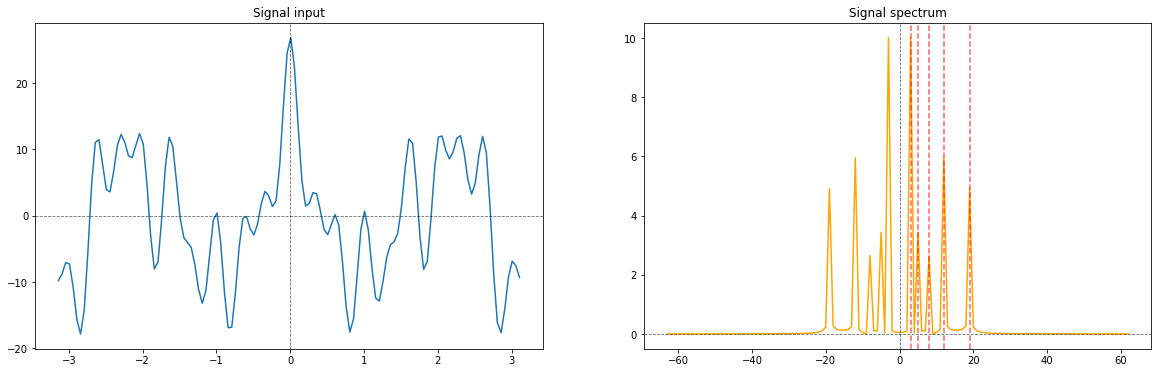

In [34]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

#Plot input signal
plt.subplot(121)
plt.plot(x,signal2)
plt.title('Signal input')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

#Plot spectrum signal
plt.subplot(122)
plt.plot(x_f,np.abs(TF_signal2)/(np.shape(x)[0]/2), color = 'orange')
plt.title('Signal spectrum')
plt.axvline(x=T[0], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[1], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[2], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[3], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[4], color='r', ls = '--', alpha=0.6)
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

plt.show()

The height of each peak in the signal spectrum is equal to the amplitude of each frequency.<br>
Let's now change the phase too and have a look at both the amplitude and phase of the Fourier transform of our signal.

In [36]:
T = [3,5,8,12,19]
P = [0.25,0.6,0.75,0.8,1]
signal = np.cos(x*T[0]+P[0]*np.pi) + np.cos(x*T[1]+P[1]*np.pi) + np.cos(x*T[2]+P[2]*np.pi) + np.cos(x*T[3]+P[3]*np.pi) + np.cos(x*T[4]+P[4]*np.pi)
TF_signal =np.fft.fftshift(np.fft.fft(signal))
amps = np.abs(TF_signal)
angs = np.angle(TF_signal)

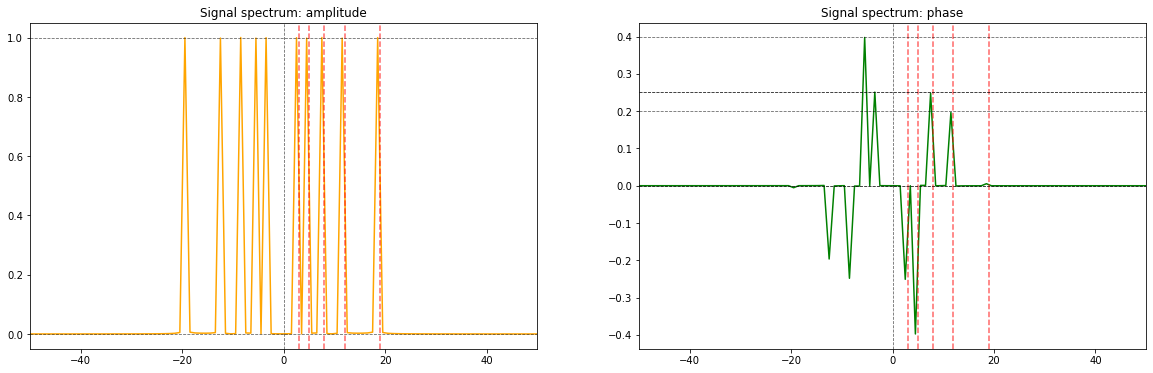

In [37]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

#Plot amplitude spectrum signal
plt.subplot(121)
plt.plot(x_f,amps/(np.shape(x)[0]/2), color = 'orange')
plt.title('Signal spectrum: amplitude')
plt.axvline(x=T[0], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[1], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[2], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[3], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[4], color='r', ls = '--', alpha=0.6)
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=1, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.xlim([-100/2.,100/2.])
         
#Plot imaginary part signal
plt.subplot(122)
plt.plot(x_f,np.arcsin(np.imag(TF_signal)/(np.shape(x)[0]/2))/(np.pi), color = 'green')
plt.title('Signal spectrum: phase')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=T[0], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[1], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[2], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[3], color='r', ls = '--', alpha=0.6)
plt.axvline(x=T[4], color='r', ls = '--', alpha=0.6)

RP = np.copy(P)
for i in range(np.shape(P)[0]):
    if P[i] > 0.5:
        RP[i]=1-P[i]
plt.axhline(y=RP[0], color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=RP[1], color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=RP[2], color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=RP[3], color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=RP[4], color='k', ls = '--', lw=0.8, alpha=0.6)
plt.xlim([-100/2.,100/2.])

plt.show()

As seen before in part 1.2, in the phase part of the FT of the signal, the height of each peak is linked to the phase shift.<br>
Beware of the sampling... less point decreases slightly the amplitude and therefore the phase.

## 1.5 Case of random noise

In [53]:
# Define data points
x = np.arange(-np.pi, np.pi, 0.005)
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

# Uniform noise 
noise_u = np.random.uniform(-1,1,np.shape(x))
TF_nu =np.fft.fftshift(np.fft.fft(noise_u))

# Gaussian noise
noise_g = np.random.normal(0,1/(np.sqrt(2)),np.shape(x))
TF_ng =np.fft.fftshift(np.fft.fft(noise_g))

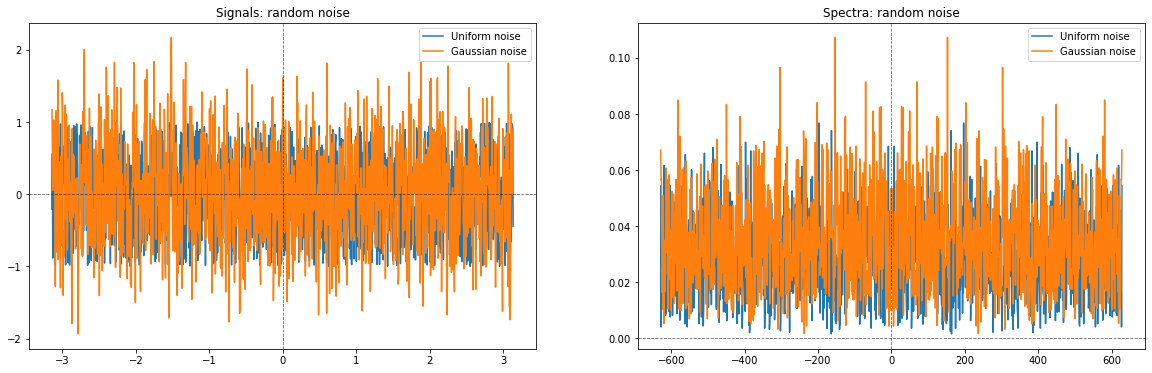

In [54]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

plt.subplot(121)
plt.title('Signals: random noise')
plt.plot(x,noise_u, label = 'Uniform noise')
plt.plot(x,noise_g, label = 'Gaussian noise')
plt.legend()
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)

plt.subplot(122)
plt.title('Spectra: random noise')
plt.plot(x_f,np.abs(TF_nu)/(np.shape(x)[0]/2), label = 'Uniform noise')
plt.plot(x_f,np.abs(TF_ng)/(np.shape(x)[0]/2), label = 'Gaussian noise')
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

plt.show()

The Fourier Transform of random noise ... remains random noise.

## 1.6 Case of signal and added random noise

In [56]:
# Define data points
x = np.arange(-np.pi, np.pi, 0.005)
x_f = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

# Redefine noiseless signal as sum of cosine waves
T = [3,5,8,12,19]
signal = np.cos(x*T[0]) +  np.cos(x*T[1]) + np.cos(x*T[2]) + np.cos(x*T[3]) + np.cos(x*T[4])
TF_signal =np.fft.fftshift(np.fft.fft(signal))
spectrum = np.abs(TF_signal)/(np.shape(x)[0]/2)

# Add uniform noise 
ampl_bruit = 7.
signal_n = signal +  np.random.uniform(-1,1,np.shape(signal)[0])*ampl_bruit
TF_sn =np.fft.fftshift(np.fft.fft(signal_n))
noisy_spectrum = np.abs(TF_sn)/(np.shape(x)[0]/2)

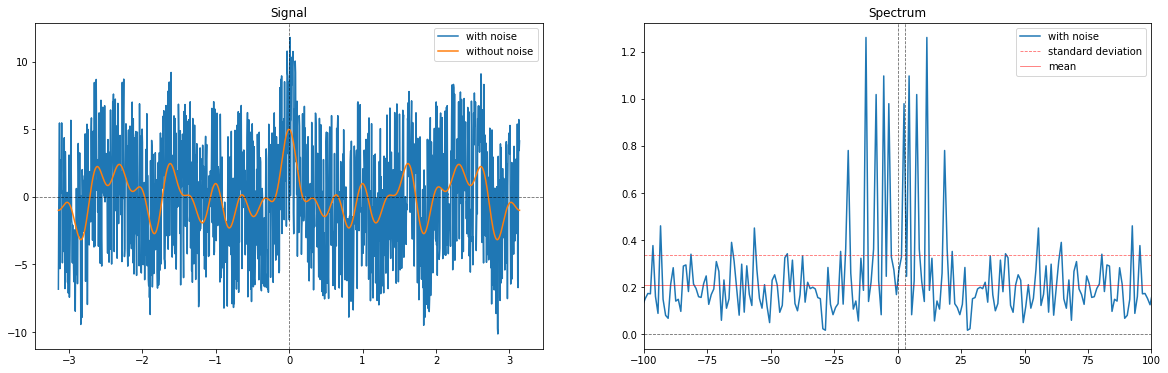

In [57]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

plt.subplot(121)
plt.title('Signal')
plt.plot(x,signal_n, label="with noise")
plt.plot(x,signal, label="without noise")
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

plt.subplot(122)
plt.title('Spectrum')
plt.plot(x_f,np.abs(TF_sn)/(np.shape(x)[0]/2), label="with noise")
#plt.plot(x_f,np.abs(TF_signal)/(np.shape(x)[0]/2), label="without noise")
plt.axhline(y=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.axhline(y=np.mean(noisy_spectrum)+np.std(noisy_spectrum), color='red', ls = '--', lw=0.8, alpha=0.6, label="standard deviation")
plt.axhline(y=np.mean(noisy_spectrum), color='red', lw=0.8, alpha=0.6, label="mean")
plt.axvline(x=3, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.xlim([-200/2.,200/2.])

plt.legend()
plt.show()

The resulting spectrum is also noisy but the peaks centered on each period are still visible.

In [58]:
print('Standard deviation spectrum', np.std(noisy_spectrum))
print('Signal max', np.max(noisy_spectrum)-np.mean(noisy_spectrum))   
print('SNR:',(np.max(noisy_spectrum)-np.mean(noisy_spectrum))/np.std(noisy_spectrum))

Standard deviation spectrum 0.12766409842782026
Signal max 1.051267211501952
SNR: 8.234634673712327


### Movie time !
Here we make an animation with increasing noise intensity added to the signal to see how the spectrum is degraded.

<IPython.core.display.Javascript object>


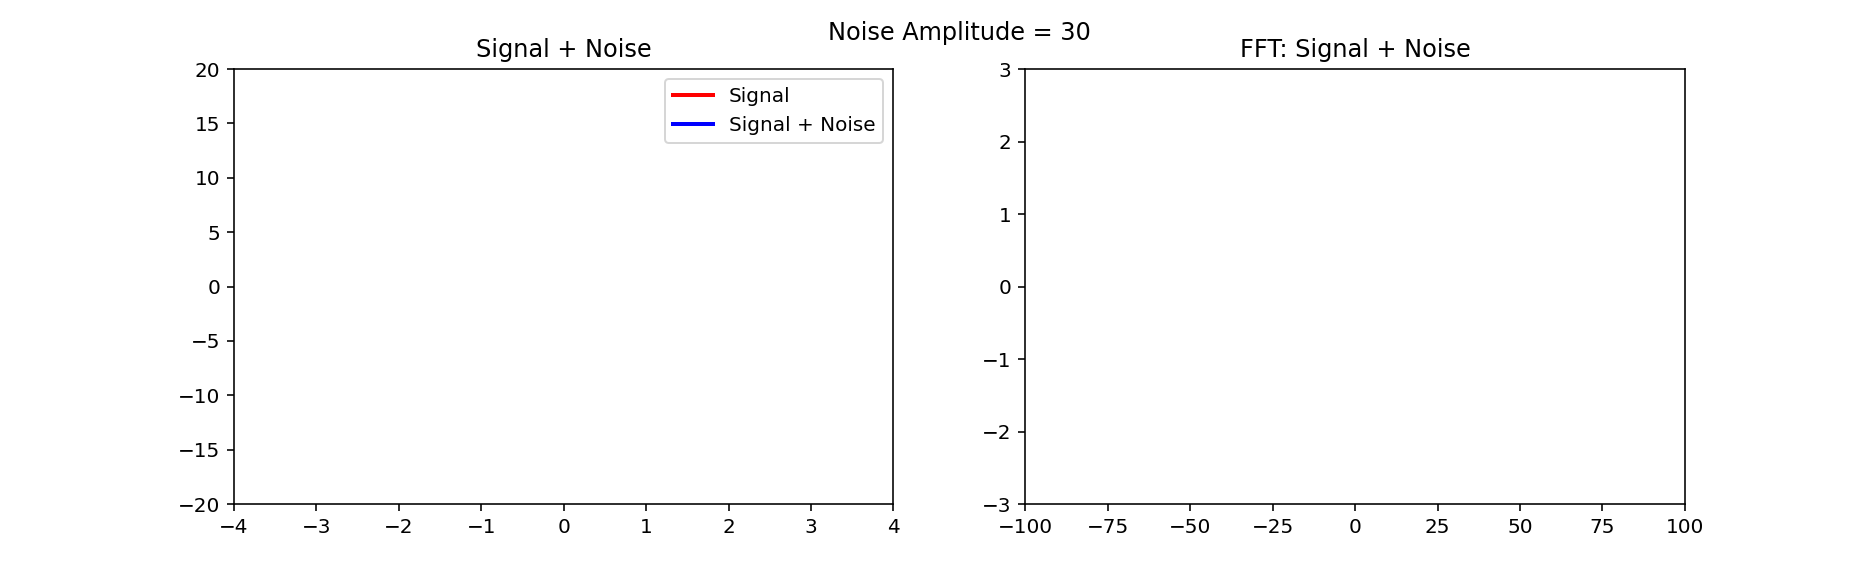

In [67]:
# Enable interactive plot
%matplotlib notebook

N_Frames = 100

fig = plt.figure(figsize=(13, 4), constrained_layout=False)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.set_title('Signal + Noise')
ax2.set_title('FFT: Signal + Noise')
label = plt.text(-120, 3.5, r'Noise Amplitude={}'.format(0), ha='center',va='center',fontsize=12,color="Black")

line1, = ax1.plot([], [], lw=2,color='r',label='Signal')
line2, = ax1.plot([], [], lw=2, color='b',label='Signal + Noise')
line3, = ax2.plot([], [], lw=2, color='r',label='Signal spectrum')
line4, = ax2.plot([], [], lw=2, color='b',label='Signal + Noise spectrum')
line = [line1, line2, line3, line4]  
ax1.set_xlim(-4,4)
ax1.set_ylim(-20,20)
ax2.set_xlim(-100,100)
ax2.set_ylim(-3,3)
ax1.legend()

def init():        
    line[0].set_data([], [])
    line[1].set_data([], [])
    line[2].set_data([], [])
    line[3].set_data([], [])
    return line
   
def animate(i):
    A_noise = i*30/N_Frames
    signal_n = signal +  A_noise*np.random.uniform(-1,1,np.shape(signal)[0])
    TF_sn = np.fft.fftshift(np.fft.fft(signal_n))
    phi = np.arcsin(TF_cosP)/np.pi
    # plots a sine graph
    line[2].set_data(x_f, np.abs(TF_signal)/(np.shape(x)[0]/2))
    line[3].set_data(x_f, np.abs(TF_sn)/(np.shape(x)[0]/2))
    line[0].set_data(x, signal)
    line[1].set_data(x, signal_n)
    label.set_text(r'Noise Amplitude = {}'.format(round(A_noise)))      
    return line

anim = FuncAnimation(fig, animate, init_func = init, frames = N_Frames , interval = 200, blit = True)

## 1.7 Case of different window functions 

In [72]:
apperture_dim = 200
aperture_sz = 50
signal_x = np.arange(apperture_dim)-apperture_dim//2 
spectr_x = np.arange(0, np.shape(signal_x)[0], 1) -  np.shape(signal_x)[0]/2

# Gaussian profile
mu = 0
sigma = np.sqrt(aperture_sz/2.)**2.
gauss = stats.norm.pdf(signal_x, mu, sigma)
gauss_y = gauss/np.max(gauss)

# Heavyside profile
door_y = (np.abs(signal_x) < aperture_sz/2.) #signal fonction porte

# Triangle profile
t = np.linspace(0, 1, aperture_sz)
tx = (signal.sawtooth(2*np.pi*t))[0:aperture_sz//2]+1
rev_tx = tx[::-1]
triangle_y = np.zeros(apperture_dim)
triangle_y[apperture_dim//2-aperture_sz//2:apperture_dim//2]=tx
triangle_y[apperture_dim//2:apperture_dim//2+aperture_sz//2]=rev_tx


#Fourier transforms
TF_door_y = np.fft.fftshift(np.fft.fft(door_y))
TF_gauss_y = np.fft.fftshift(np.fft.fft(gauss_y))
TF_triangle_y = np.fft.fftshift(np.fft.fft(triangle_y))

0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18


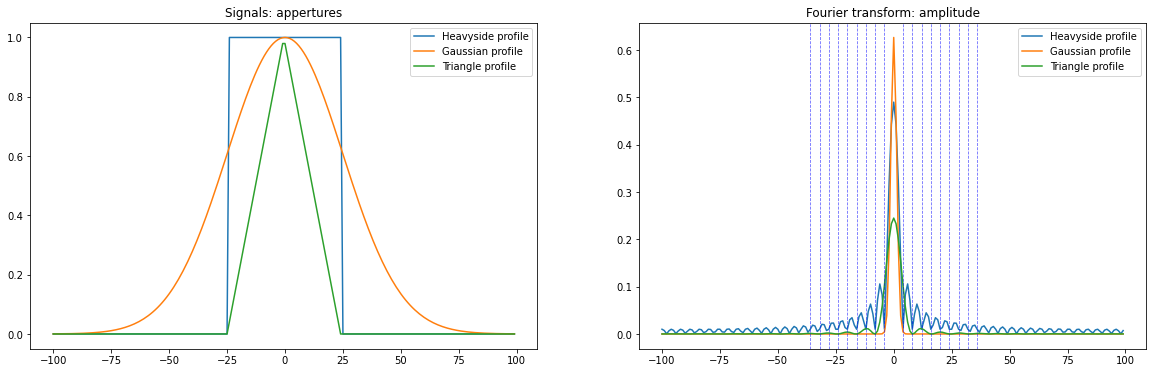

In [73]:
%matplotlib inline
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

plt.subplot(121)
plt.plot(signal_x, door_y, label = 'Heavyside profile')
plt.plot(signal_x, gauss_y, label = 'Gaussian profile')
plt.plot(signal_x, triangle_y, label = 'Triangle profile')
plt.title('Signals: appertures')
plt.legend()

plt.subplot(122)
plt.plot(spectr_x,np.abs(TF_door_y)/(np.shape(signal_x)[0]/2), label = 'Heavyside profile')
plt.plot(spectr_x,np.abs(TF_gauss_y)/(np.shape(signal_x)[0]/2), label = 'Gaussian profile')
plt.plot(spectr_x,np.abs(TF_triangle_y)/(np.shape(signal_x)[0]/2), label = 'Triangle profile')
plt.title('Fourier transform: amplitude')
#Plotting minimas
minimas =[]
for i in range(1,10):
    print(i/aperture_sz)
    plt.axvline(x=i*(np.shape(signal_x)[0])/aperture_sz, color='blue', ls = '--', lw=0.8, alpha=0.6)
    plt.axvline(x=-i*(np.shape(signal_x)[0])/aperture_sz, color='blue', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

plt.show()

With this exercise, we start to understand the notion of apodization. The Heavyside profile (blue) has sharp edges, which provokes Gibbs oscillations (https://en.wikipedia.org/wiki/Gibbs_phenomenon) when going from the real to the Fourier space. Those ripples are similar to what happens with the diffraction of light through a given aperture.

### What's with the Gaussian ?

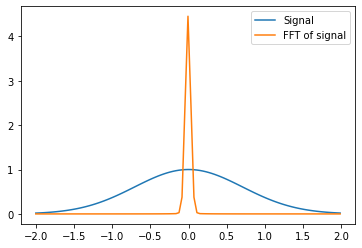

In [77]:
N = 128
g = 2 #you can modify this value
x = np.arange(-g, g, 10./(2 * N))
y = np.exp(-x * x)
y_fft = np.fft.fftshift(np.abs(np.fft.fft(y))) / np.sqrt(len(y))
plt.plot(x,y, label="Signal")
plt.plot(x,y_fft, label="FFT of signal")
plt.legend()
plt.show()

Whatever happens, the FFT of any type of Gaussian remains the same...<br>
It's not comparable ! Plotting them in the same window makes for the trick but if you look at the amplitude, it changes !

The message remains: the FFT of a Gaussian is a Gaussian !

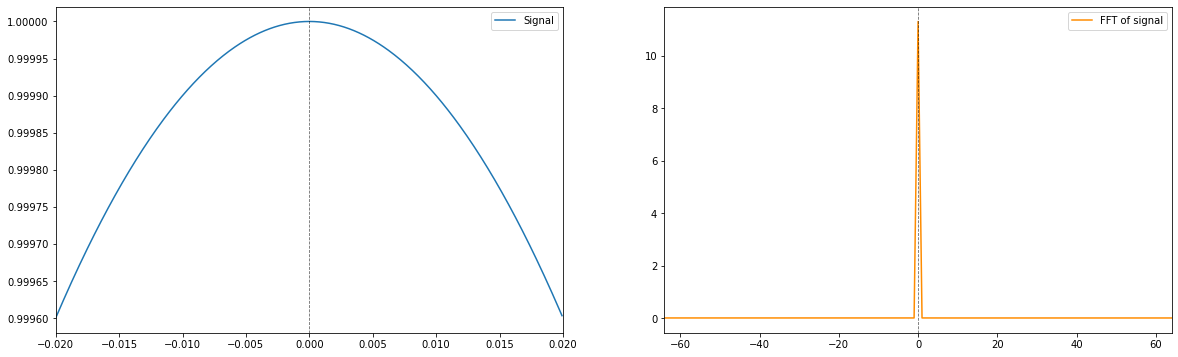

In [79]:
plt.figure(figsize=(10*2, 3*2), constrained_layout=False)

N = 128
sz = 1/50
x = np.arange(-sz, sz, sz/(2 * N))
x_fft = np.arange(0, np.shape(x)[0], 1) - np.shape(x)[0]/2

#Plot the input signal
plt.subplot(121)
y = np.exp(-x * x)
plt.plot(x,y, label="Signal")
plt.xlim([-sz,sz])
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

#Plot the output signal with equivalent window cut
plt.subplot(122)
y_fft = np.fft.fftshift(np.abs(np.fft.fft(y))) / np.sqrt(len(y))
plt.plot(x_fft, y_fft/2, label="FFT of signal", color='darkorange')
plt.xlim([-N/2.,N/2.])
plt.axvline(x=0, color='k', ls = '--', lw=0.8, alpha=0.6)
plt.legend()

plt.show()

The FWHM of the Gaussian in input correlates with the FWHM of the Gaussian in output: the wider in the real space, the thinner in the Fourier space and vice-versa. Change the parameter $sz$ to check this behavior.

Check out the table of Fourier transform (e.g. https://en.wikipedia.org/wiki/Fourier_transform, end of page) to check this behavior in math.

[Go to the top](#Table-of-contents)